### Multiple Linear Regression

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [77]:
df=pd.read_csv('50_Startups.csv')

In [79]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [81]:
## Profit is my dependent feature 
## Lets devide into dependent and independent features 

x=df.iloc[:,:-1]   #independent fearures
y=df.iloc[:,-1]         #dependent feature

In [83]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [103]:
## there is one categorical feature 'Stage', Lets do one hot encoding 
states=pd.get_dummies(x['State'],drop_first=True,dtype=int)

In [105]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [111]:
x=x.drop('State',axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [115]:
x=pd.concat([x,states],axis=1)

In [117]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [119]:
## import train test split and make train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=None)

In [121]:
## import the Linear Regression Model 
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()

In [123]:
## fit the model for training 
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [129]:
## Now test the model with test data 
y_pred=lin_regressor.predict(x_test)

In [131]:
## import r2 score 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [133]:
score

0.9307040836719974

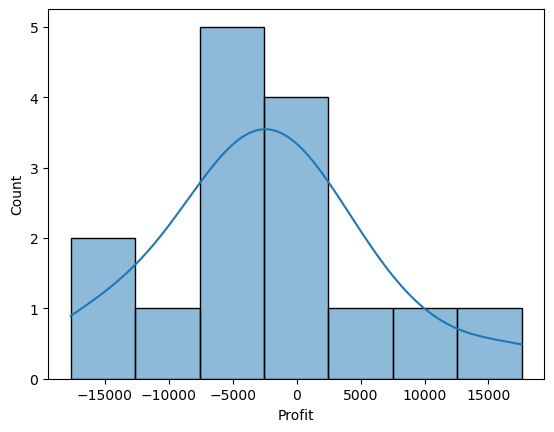

In [168]:
sns.histplot(y_pred-y_test,kde=True)
plt.show()